In [1]:
import DriverDataIO as io

In [2]:
trip = io.get_trip(1,1,'../drivers/')

In [3]:
%matplotlib inline

In [4]:
import DriverChallengeHelperFunctions as helpers

In [5]:
speed = helpers.get_speed(trip)

In [6]:
import DriverChallengeVisualization as vis

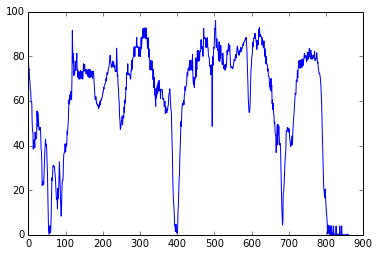

In [7]:
vis.plot_speed(speed)

In [8]:
speed = helpers.smooth_speed(speed)

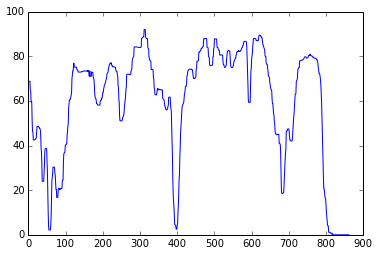

In [9]:
vis.plot_speed(speed)

In [70]:
def bin_speed_interval(_speed, _from, _to):    
    """
    Returns time values where the speed falls between the given _from and _to margins. 
    @return time points where speed is in the interval.
    """
    acc = helpers.get_acceleration(_speed)
    
    _speed = _speed[1:]
    
    intervals = []
    # start at index 2 due to shift of indices after deriving distance to acceleration
    for sec, (sp, ac) in enumerate(zip(_speed, acc), start=2):
        if sp >= _from and sp <= _to and ac >= 0:
            intervals.append(sec)
        
    return intervals

In [71]:
tentothirty = bin_speed_interval(speed, 10, 30)

This interval contains all points where driver's speed lay in 10 to 30 kmh interval.

In [60]:
def plot_acceleration(_speed, intervals):
    import matplotlib.pyplot as plt
    plt.plot(range(len(_speed)), _speed, 'b-')
    
    styles = ['kx', 'ro', 'go', 'yo'] # marker styles
    for style, interval in enumerate(intervals):
        for i in interval:
            plt.plot(i, _speed[i], styles[style%len(styles)])
    

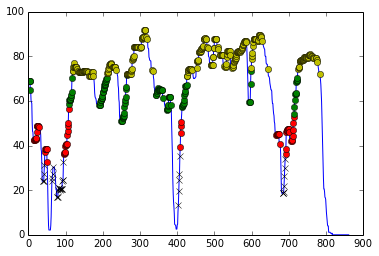

In [72]:
plot_acceleration(speed, (bin_speed_interval(speed, 10, 30), bin_speed_interval(speed, 31, 50), bin_speed_interval(speed, 51, 70), bin_speed_interval(speed, 71, 100), ))

The plot above shows points in which the driver's speed was in the 10-30 kmh interval.

The above plot demonstrates that using discrete time periods is not sufficient for the task. Some points lie outside of the designated interval. Next time: use continuous time scale and recompute the bins.

Next, compute median and variation values of each speed bin.

In [66]:
def get_median(_speed):
    from numpy import median
    return median(_speed)

In [76]:
def bin_speed(_speed, _to, _from):
    """
    Returns list of speed values for the given _from and _to interval.
    """
    ret = []
    for sec in bin_speed_interval(_speed, _to, _from):
        ret.append(_speed[sec])
        
    return ret

In [78]:
tentothirty_speed = bin_speed(speed, 10, 30)

In [80]:
tentothirty_median_speed = get_median(bin_speed(speed, 10,30))

In [81]:
print tentothirty_median_speed

21.7465031672


We have computed the median speed in the interval where the driver goes with speed between 10 and 30 kmh.